Aim - To develop a **machine-learning classification model** for a real-time medical diagnosis problem to identify whether **a person is diabetic or not.**

Useful info
- Diabetics are classified as type 1 and type 2, and gestational diabetes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [13]:
df

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...,...
609,14,1,189,60,23,846,30.1,0.398,59,1
610,555,1,84,64,23,115,36.9,0.471,28,0
611,730,2,92,52,0,0,30.1,0.141,22,0
612,103,0,125,96,0,0,22.5,0.262,21,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [10]:
df.diabetes.value_counts()/len(df)*100

diabetes
0    65.14658
1    34.85342
Name: count, dtype: float64

In [3]:
X=df.drop(['p_id', 'diabetes'], axis=1)

In [4]:
Y=df.diabetes.values

In [5]:
X

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27
...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59
610,1,84,64,23,115,36.9,0.471,28
611,2,92,52,0,0,30.1,0.141,22
612,0,125,96,0,0,22.5,0.262,21


In [6]:
Y

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

### Check Outlier

In [7]:
X.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733
std,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000
max,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000


There is significant outlier for serum insulin column, however the max value is not impossible and considered significant for our analysis.

### Handle impossible/null values
There is impossible value such as zeroes in place of glucose concentration, blood pressure ect. Will treat them as missing.

In [13]:
df[col] = df[col].replace(0, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  610 non-null    float64
 3   blood_pressure         583 non-null    float64
 4   skin_fold_thickness    427 non-null    float64
 5   serum_insulin          310 non-null    float64
 6   bmi                    604 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 48.1 KB


Data is considered valuable to be dropped or filled. 

# EDA

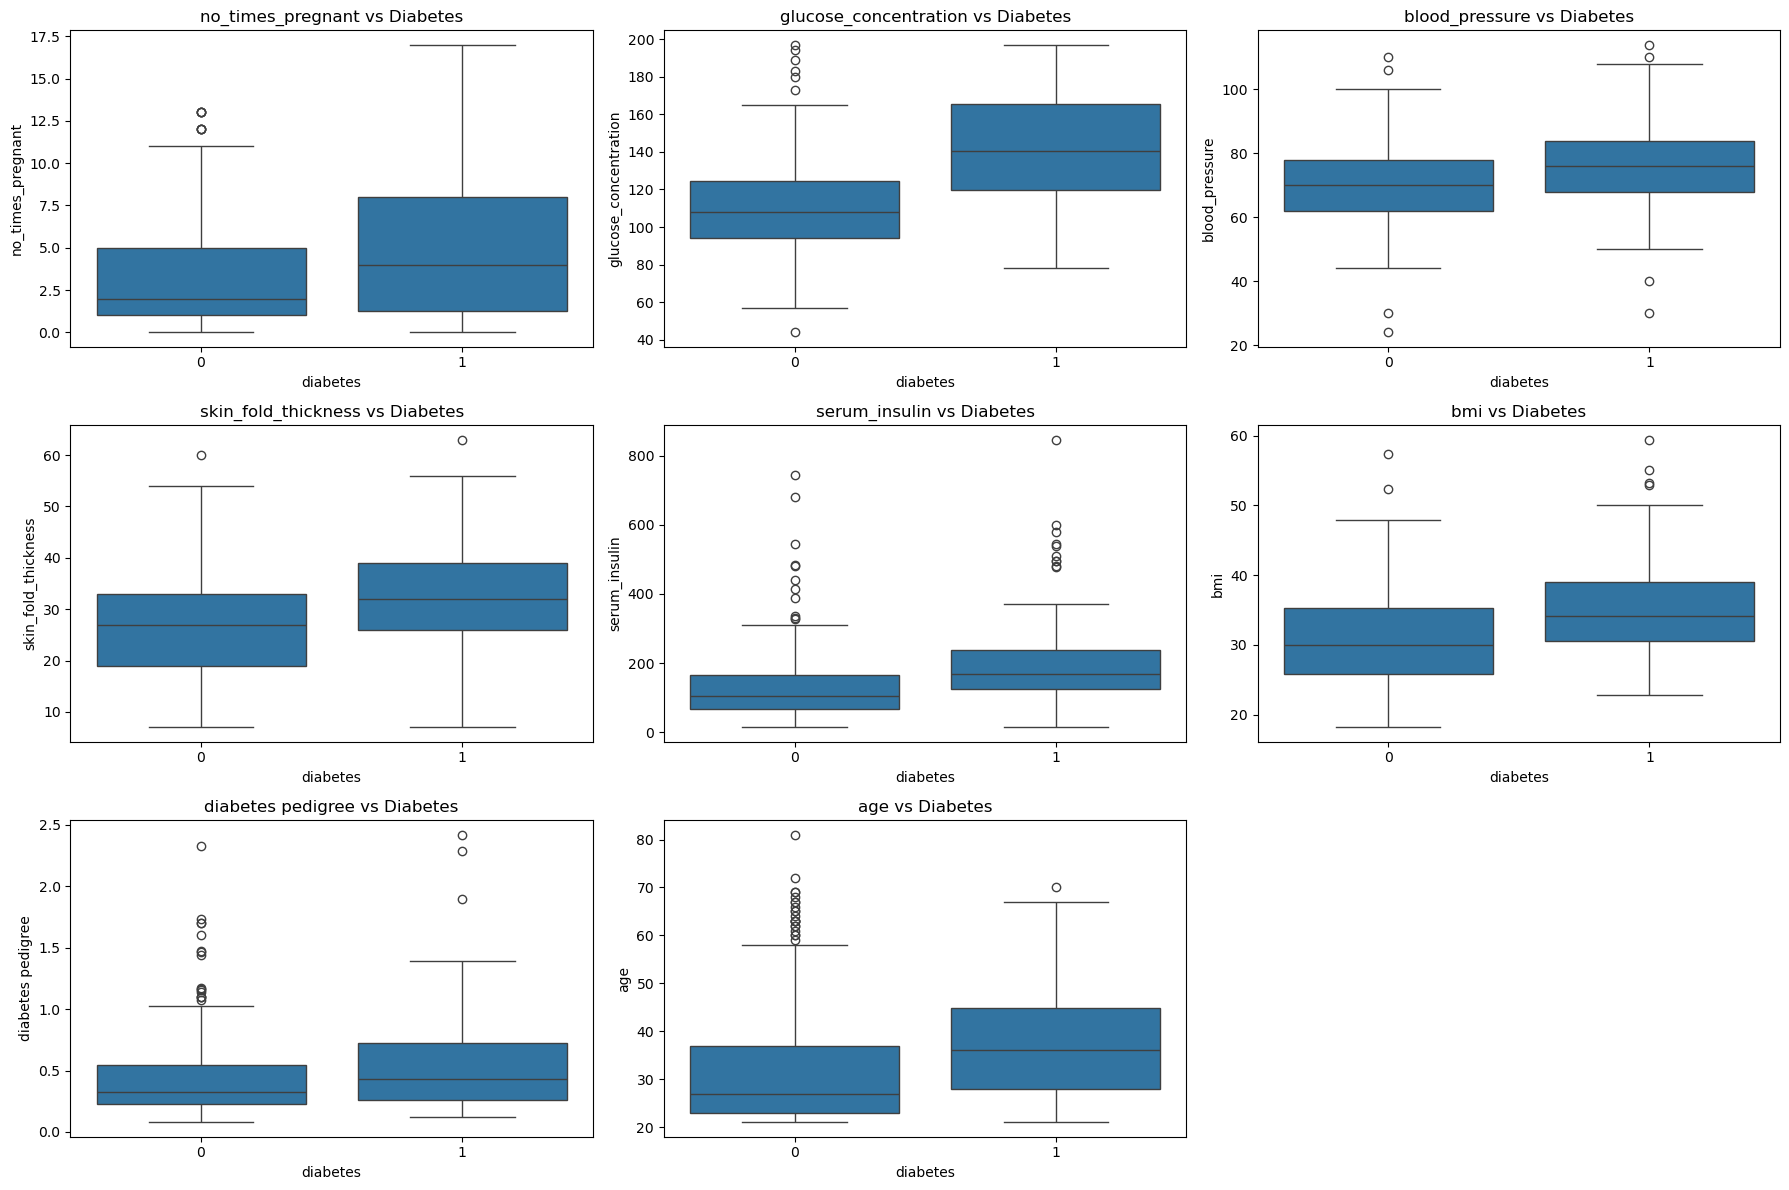

In [15]:
plt.figure(figsize=(18,12))
for i, col in enumerate(X):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='diabetes', y=col)
    plt.title(f'{col} vs Diabetes')
plt.tight_layout()
plt.show()

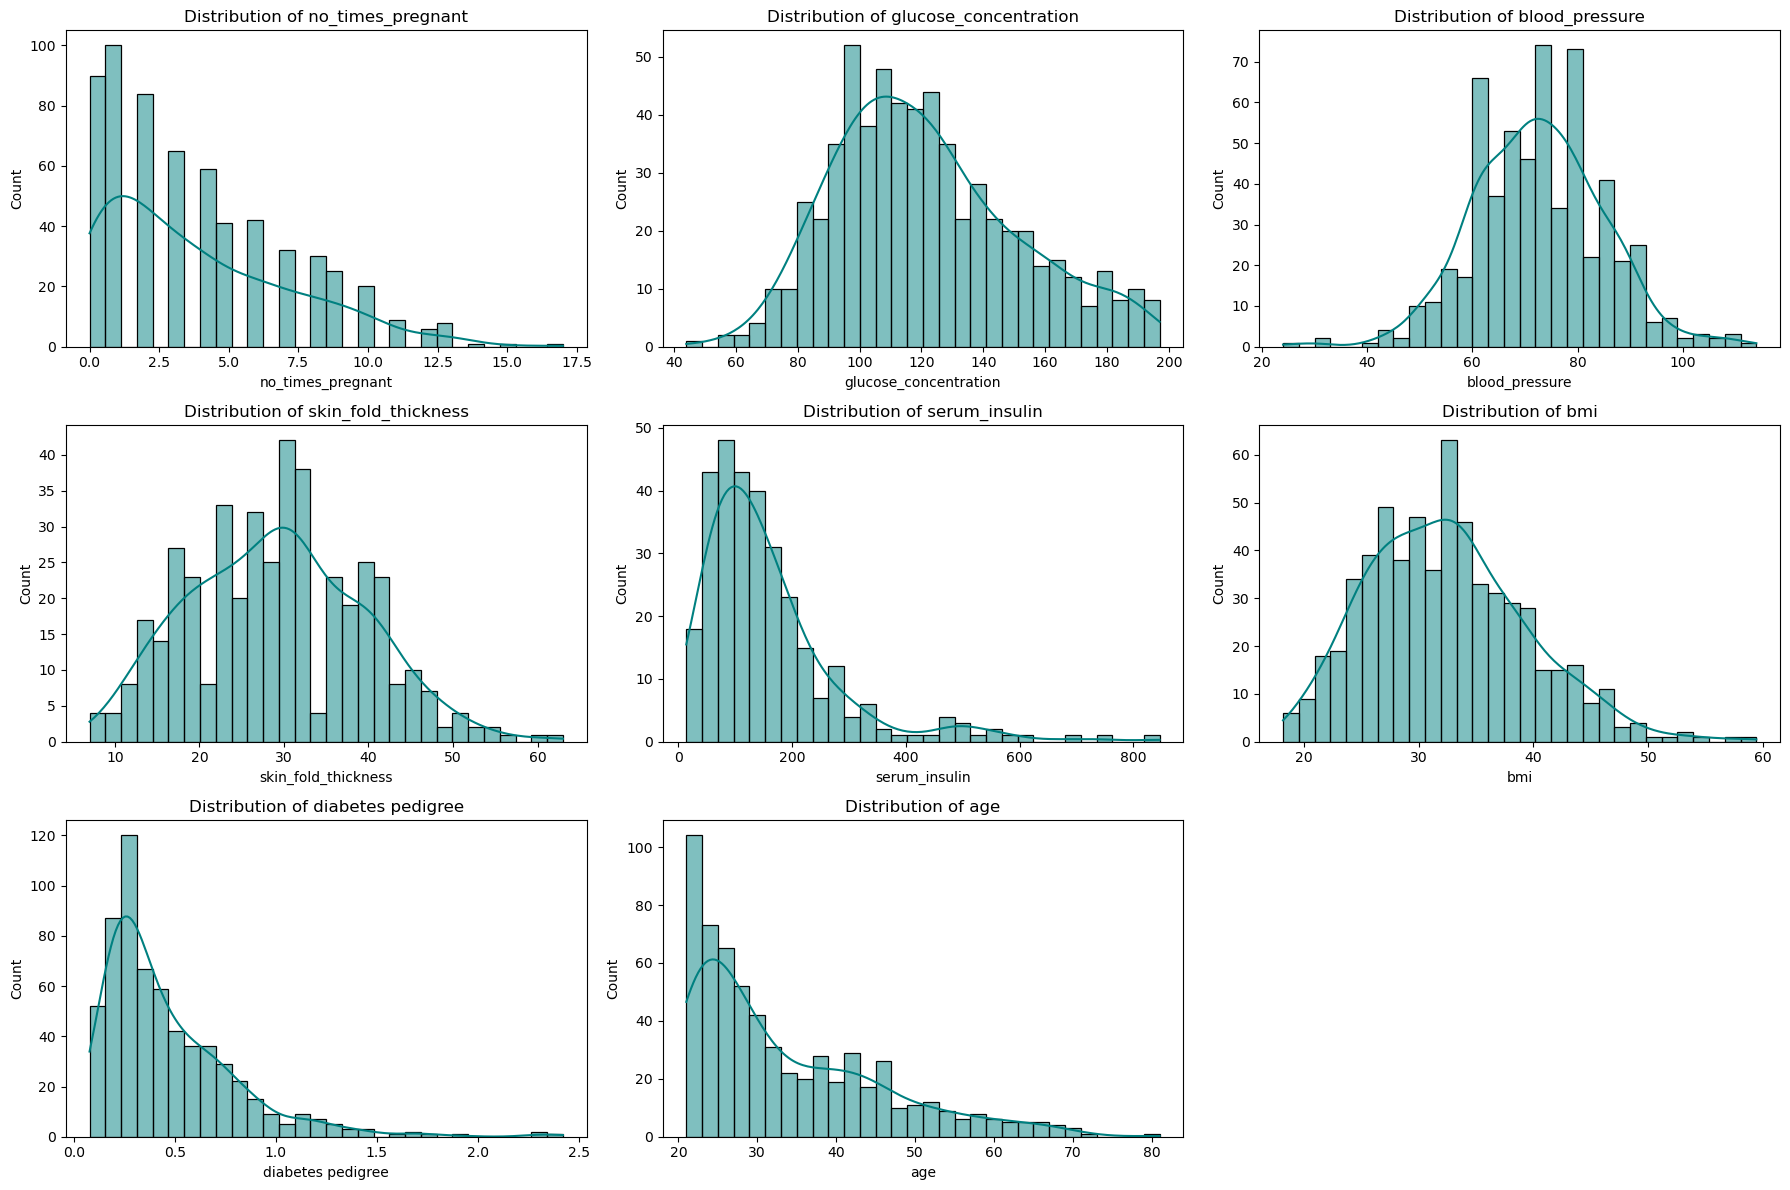

In [16]:
plt.figure(figsize=(18,12))
for i, col in enumerate(X):  # Exclude 'diabetes'
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

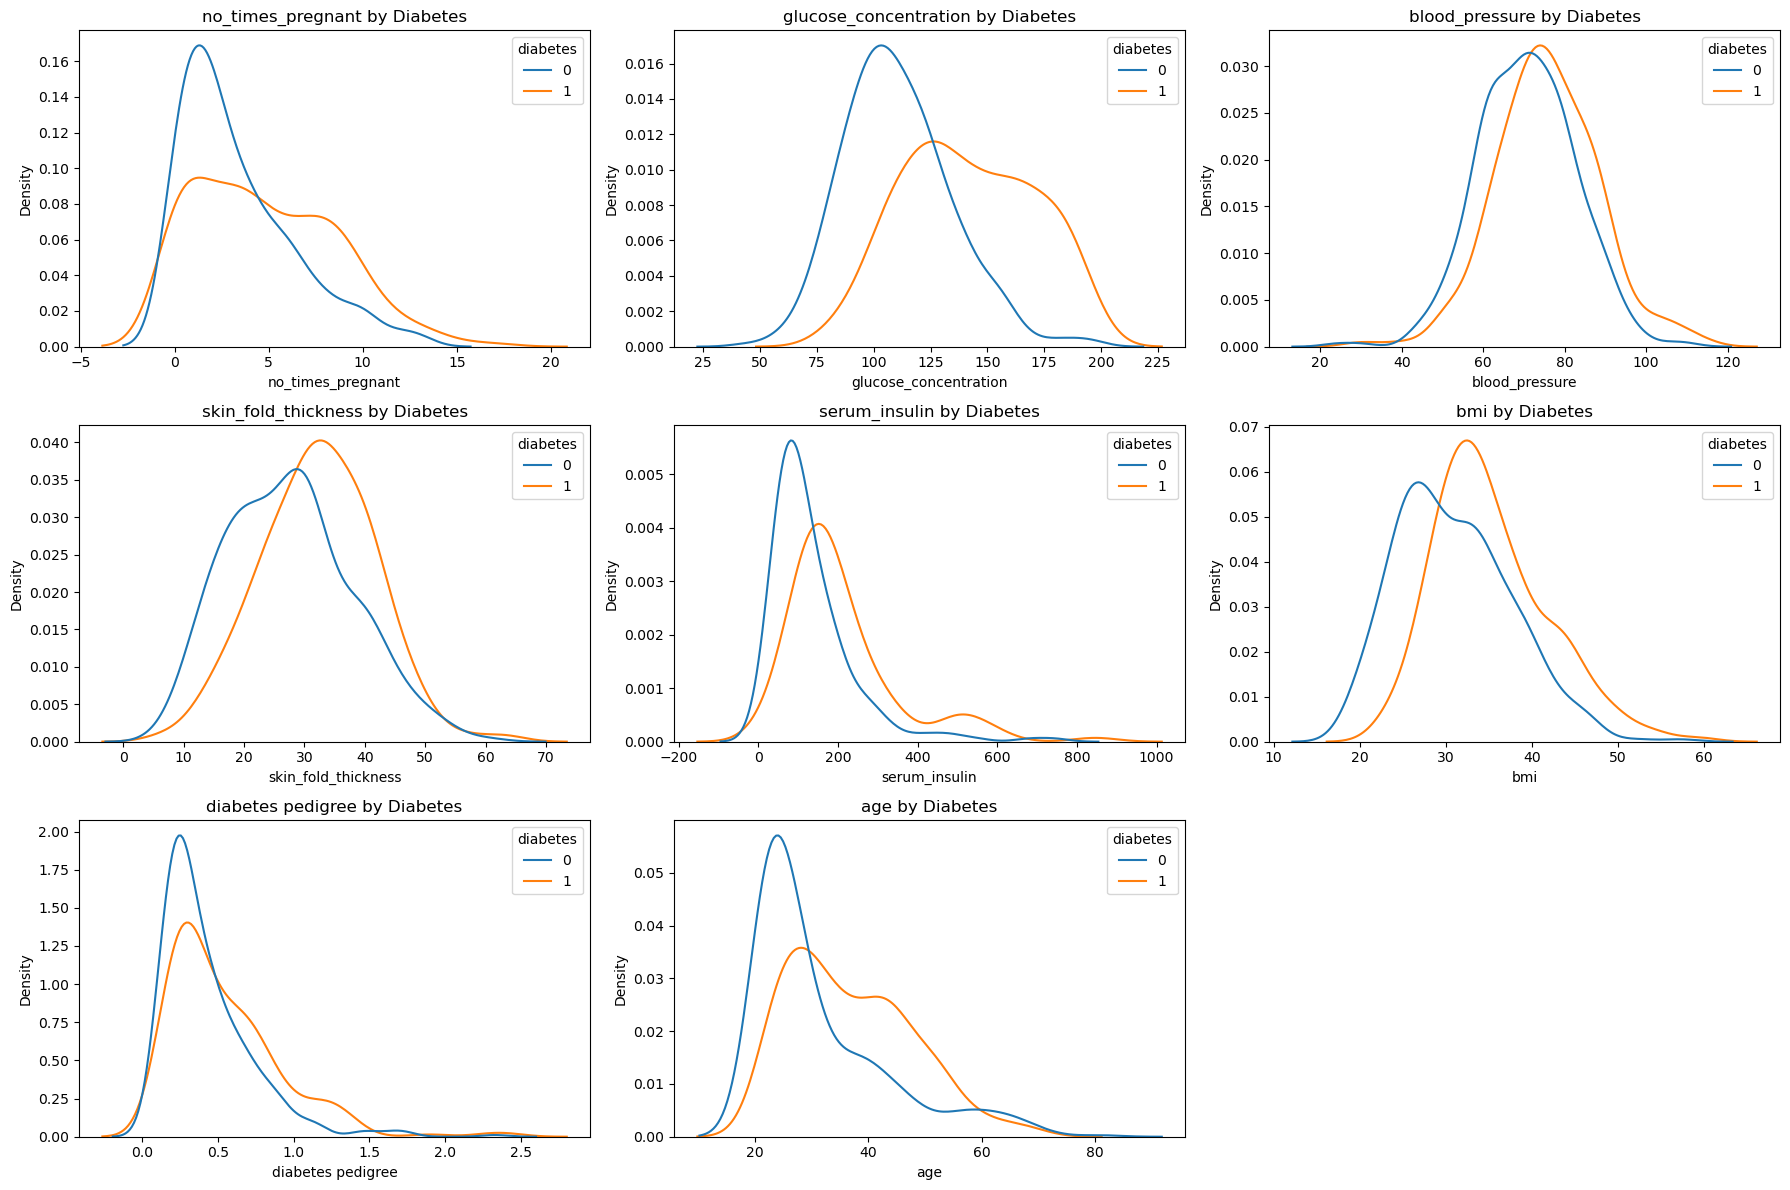

In [18]:
# KDE plots by diabetes class
plt.figure(figsize=(18,12))
for i, col in enumerate(X):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data=df, x=col, hue='diabetes', common_norm=False)
    plt.title(f'{col} by Diabetes')
plt.tight_layout()
plt.show()

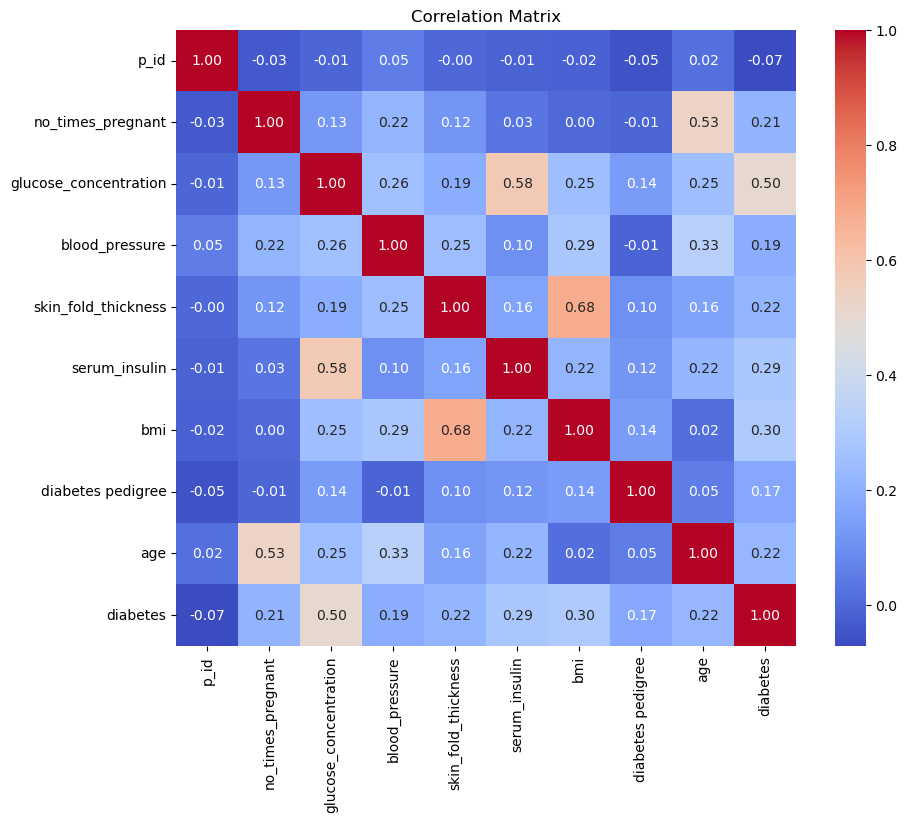

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Insight
* Glucose concentration has the medium positive correlation, followed by BMI and serum insulin. All of the variable has positive correlation with diabetes.
* Diabetes have 35:65 ratio.
* Outlier for serum insulin
* Zeroes value will be considered as missing. 

# Classification Machine Learning

In [23]:
# Splitting the data into training & test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

In [24]:
len(X_train)

460

In [25]:
len(X_test)

154

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [27]:
X_train_sc

array([[-1.14615415,  0.06056298,  0.95297854, ...,  0.3908188 ,
        -0.81164071, -0.37141394],
       [ 0.60544355, -0.71762054, -0.54129527, ...,  0.24073394,
        -0.12210091,  0.8115266 ],
       [ 1.18930945, -0.6864932 ,  0.75374203, ...,  0.41583295,
        -0.24639564,  1.40299687],
       ...,
       [-1.14615415,  1.36791129,  0.35526901, ...,  1.97921692,
        -0.62815802, -0.6249012 ],
       [ 2.0651083 ,  0.52747309,  0.25565076, ...,  0.50338245,
         0.25374267,  1.40299687],
       [ 1.77317535,  0.12281766,  0.05641425, ..., -0.12197114,
        -0.78796553,  0.64253509]])

In [28]:
X_test_sc

array([[-0.56228825, -0.96663927,  0.55450552, ..., -0.95994495,
        -0.657752  , -0.7938927 ],
       [ 0.8973765 ,  1.18114724, -0.24244051, ..., -0.58473279,
        -0.52457908,  0.55803934],
       [-0.56228825,  0.77649181,  0.35526901, ...,  0.76603096,
        -0.42100014, -0.37141394],
       ...,
       [ 1.18930945,  2.02158544,  1.05259679, ...,  0.3032693 ,
        -0.1428167 ,  0.30455208],
       [ 0.60544355, -0.49972915,  0.55450552, ...,  0.05312787,
         1.20370952, -0.6249012 ],
       [-0.56228825, -0.03281904,  0.35526901, ...,  0.95363703,
        -0.75837154, -0.37141394]])

#### kNN Classifier

In [32]:
# Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initiating the classifier
model = KNeighborsClassifier()

# Passing the data to classifier
model.fit(X_train_sc, Y_train)

KNeighborsClassifier()

In [33]:
Y_pred = model.predict(X_test_sc)

In [35]:
Y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [36]:
Y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [38]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred)*100)

80.51948051948052


#### New data prediction

In [39]:
X_test_sc

array([[-0.56228825, -0.96663927,  0.55450552, ..., -0.95994495,
        -0.657752  , -0.7938927 ],
       [ 0.8973765 ,  1.18114724, -0.24244051, ..., -0.58473279,
        -0.52457908,  0.55803934],
       [-0.56228825,  0.77649181,  0.35526901, ...,  0.76603096,
        -0.42100014, -0.37141394],
       ...,
       [ 1.18930945,  2.02158544,  1.05259679, ...,  0.3032693 ,
        -0.1428167 ,  0.30455208],
       [ 0.60544355, -0.49972915,  0.55450552, ...,  0.05312787,
         1.20370952, -0.6249012 ],
       [-0.56228825, -0.03281904,  0.35526901, ...,  0.95363703,
        -0.75837154, -0.37141394]])

In [40]:
X_test.columns

Index(['no_times_pregnant', 'glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'],
      dtype='object')

In [50]:
data = [[11, 140, 87, 20, 100, 25, 0.6, 32]]

In [51]:
data_sc = sc.transform(data)

single = model.predict(data_sc)

print(single)

[1]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
data_sc = sc.transform(data)

single = model.predict_proba(data_sc)

print(single)

[[0.4 0.6]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### Decision Tree Classifier

In [54]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt = DecisionTreeClassifier()

# Passing the data to classifier
model_dt.fit(X_train_sc, Y_train)

DecisionTreeClassifier()

In [55]:
Y_pred_dt = model_dt.predict(X_test_sc)

In [56]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred_dt)*100)

69.48051948051948


#### Ensemble Learning - Boosting

In [57]:
# GradientBoosting
# ExtremeGradientBoosting (XGBoost)
# AdaBoost
# CatBoost etc.....

In [58]:
# Call the AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# Initiating the classifier
model_ada = AdaBoostClassifier(n_estimators=100)

# Passing the data to classifier
model_ada.fit(X_train_sc, Y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [59]:
Y_pred_ada = model_ada.predict(X_test_sc)

In [60]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_ada)*100)

76.62337662337663


#### Random Forest Classifier

In [61]:
# Call the DT Classifier
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf = RandomForestClassifier()

# Passing the data to classifier
model_rf.fit(X_train_sc, Y_train)

RandomForestClassifier()

In [62]:
Y_pred_rf = model_rf.predict(X_test_sc)

In [63]:
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred_rf)*100)

79.87012987012987


# Conclusion

From 4 different type of classifier, KNN produce best result with prediction of 81%.